In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.constants import c
import tempfile
import tarfile
import casatools

In [2]:
fname = '../data/visibilities/twhya_smoothed.ms'

In [5]:
msmd = casatools.msmetadata()
ms = casatools.ms()
tb = casatools.table()

In [7]:
tb.open(fname)
colnames = tb.colnames()
tb.close()
print(colnames)

['UVW', 'FLAG', 'FLAG_CATEGORY', 'WEIGHT', 'SIGMA', 'ANTENNA1', 'ANTENNA2', 'ARRAY_ID', 'DATA_DESC_ID', 'EXPOSURE', 'FEED1', 'FEED2', 'FIELD_ID', 'FLAG_ROW', 'INTERVAL', 'OBSERVATION_ID', 'PROCESSOR_ID', 'SCAN_NUMBER', 'STATE_ID', 'TIME', 'TIME_CENTROID', 'DATA']


In [8]:
msmd.open(fname)
spws = msmd.datadescids()
msmd.done()
print(spws)

[0]


2024-02-28 08:41:16	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on ../data/visibilities/twhya_smoothed.ms...


In [9]:
tb.open(fname + "/DATA_DESCRIPTION")
SPECTRAL_WINDOW_ID = tb.getcol("SPECTRAL_WINDOW_ID")
tb.close()
print(SPECTRAL_WINDOW_ID)

[0]


In [10]:
spw_id = 0
msmd.open(fname)
chan_freq = msmd.chanfreqs(spw_id)
msmd.done()
nchan = len(chan_freq)
print(nchan)
print(chan_freq)

48
[3.72535223e+11 3.72540105e+11 3.72544988e+11 3.72549871e+11
 3.72554754e+11 3.72559637e+11 3.72564520e+11 3.72569402e+11
 3.72574285e+11 3.72579168e+11 3.72584051e+11 3.72588934e+11
 3.72593816e+11 3.72598699e+11 3.72603582e+11 3.72608465e+11
 3.72613348e+11 3.72618230e+11 3.72623113e+11 3.72627996e+11
 3.72632879e+11 3.72637762e+11 3.72642645e+11 3.72647527e+11
 3.72652410e+11 3.72657293e+11 3.72662176e+11 3.72667059e+11
 3.72671941e+11 3.72676824e+11 3.72681707e+11 3.72686590e+11
 3.72691473e+11 3.72696355e+11 3.72701238e+11 3.72706121e+11
 3.72711004e+11 3.72715887e+11 3.72720770e+11 3.72725652e+11
 3.72730535e+11 3.72735418e+11 3.72740301e+11 3.72745184e+11
 3.72750066e+11 3.72754949e+11 3.72759832e+11 3.72764715e+11]


2024-02-28 08:41:46	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on ../data/visibilities/twhya_smoothed.ms...


In [11]:
spw_id = 0
ms.open(fname)
ms.selectinit(spw_id)
d = ms.getdata(["uvw"])  
ms.done()
# d["uvw"] is an array of float64 with shape [3, nvis]
uu, vv, ww = d["uvw"]  # unpack into len nvis vectors

Text(0, 0.5, '$v$ [m]')

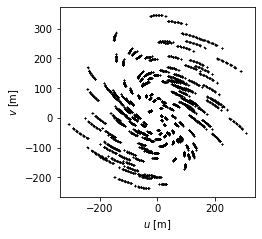

In [12]:
fig, ax = plt.subplots(nrows=1, figsize=(3.5, 3.5))
ax.scatter(uu, vv, s=1.5, rasterized=True, linewidths=0.0, c="k")
ax.set_xlabel(r"$u$ [m]")
ax.set_ylabel(r"$v$ [m]")

In [17]:
uu

array([108.79658039, -70.59373831, -36.16480149, ..., -45.54947703,
       -19.70774314,  25.84173389])

In [18]:
uu.shape

(44772,)

In [19]:
# broadcast to the same shape as the data
# stub to broadcast uu,vv, and weights to all channels
broadcast = np.ones((nchan, 1))
uu = uu * broadcast
vv = vv * broadcast

uu

array([[108.79658039, -70.59373831, -36.16480149, ..., -45.54947703,
        -19.70774314,  25.84173389],
       [108.79658039, -70.59373831, -36.16480149, ..., -45.54947703,
        -19.70774314,  25.84173389],
       [108.79658039, -70.59373831, -36.16480149, ..., -45.54947703,
        -19.70774314,  25.84173389],
       ...,
       [108.79658039, -70.59373831, -36.16480149, ..., -45.54947703,
        -19.70774314,  25.84173389],
       [108.79658039, -70.59373831, -36.16480149, ..., -45.54947703,
        -19.70774314,  25.84173389],
       [108.79658039, -70.59373831, -36.16480149, ..., -45.54947703,
        -19.70774314,  25.84173389]])

In [20]:
uu.shape

(48, 44772)

In [23]:
tb.open(fname)
weight = tb.getcol("WEIGHT")  # array of float64 with shape [npol, nvis]
flag = tb.getcol("FLAG")  # array of bool with shape [npol, nchan, nvis]
data_raw = tb.getcol("DATA")  # array of complex128 with shape [npol, nchan, nvis]
#data_corrected = tb.getcol(
#    "CORRECTED_DATA"
#)  # array of complex128 with shape [npol, nchan, nvis]
tb.close()

True

In [26]:
data_raw.shape

(2, 48, 44772)

In [28]:
np.any(flag)

False

In [29]:
tb.open(fname)
uvw = tb.getcol("UVW")  # array of float64 with shape [3, nvis]
weight = tb.getcol("WEIGHT")  # array of float64 with shape [npol, nvis]
flag = tb.getcol("FLAG")  # array of bool with shape [npol, nchan, nvis]
data = tb.getcol("DATA")  # array of complex128 with shape [npol, nchan, nvis]
tb.close()

True

In [30]:
# average the polarizations
# https://en.wikipedia.org/wiki/Weighted_arithmetic_mean
data = np.sum(data * weight[:, np.newaxis, :], axis=0) / np.sum(weight, axis=0)

**Incomplete**\
For further steps, see tutorial at: https://mpol-dev.github.io/visread/tutorials/introduction_to_casatools.html#intro-casatools-label